<a href="https://colab.research.google.com/github/shrivatsashetty/Projects/blob/main/Smartphone_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENTIMENT ANALYSIS PROJECT ON AMAMZON CUSTOMER REVIEWS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# nltk module for text processing
import nltk


# Item Table

In [ ]:
item_table = pd.read_csv("/content/drive/MyDrive/Data-Science/20191226-items.csv")

# Review Table

In [ ]:
review_table = pd.read_csv("/content/drive/MyDrive/Data-Science/20191226-reviews.csv")

# Checking Structure of each

In [ ]:
item_table.shape

(720, 10)

In [ ]:
item_table.isna().sum()

asin             0
brand            4
title            0
url              0
image            0
rating           0
reviewUrl        0
totalReviews     0
price            0
originalPrice    0
dtype: int64

In [ ]:
item_table = item_table.dropna()

In [ ]:
review_table.shape

(67986, 8)

In [ ]:
review_table.isna().sum()

asin                0
name                2
rating              0
date                0
verified            0
title              14
body               21
helpfulVotes    40771
dtype: int64

In [ ]:
review_table = review_table.drop('helpfulVotes', axis = 1)

In [ ]:
review_table = review_table.dropna()

In [ ]:
review_table.head(3)

,asin,name,rating,date,verified,title,body
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha..."


In [ ]:
item_table.head(3)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0


In [ ]:
item_series = item_table['originalPrice'].value_counts()

In [ ]:
(item_series !=0 ).sum()

89

# Dropping unwanted columns

In [ ]:
review_table.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body'], dtype='object')

In [ ]:
item_table.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [ ]:
item_table = item_table.drop(columns = ['url', 'image', 'reviewUrl'], axis = 1)

In [ ]:
common_occurrences = review_table[review_table['asin'].isin(item_table['asin'])]


In [ ]:
common_occurrences.head(5)

,asin,name,rating,date,verified,title,body
14,B0009N5L7K,Marcel Thomas,1,"March 5, 2016",True,Stupid phone,DON'T BUY OUT OF SERVICE
15,B0009N5L7K,William B.,4,"February 9, 2006",False,Exellent Service,I have been with nextel for nearly a year now ...
16,B0009N5L7K,K. Mcilhargey,5,"February 7, 2006",False,I love it,"I just got it and have to say its easy to use,..."
17,B0009N5L7K,Stephen Cahill,1,"December 20, 2016",True,Phones locked,1 star because the phones locked so I have to ...
18,B0009N5L7K,Mihir,5,"December 13, 2009",True,Excellent product,The product has been very good. I had used thi...


In [ ]:
review_table = common_occurrences

# Now the review table contains only the entries whose asin(id) is present in the item table

# Checking for null if any

In [ ]:
item_table.isna().sum()

asin             0
brand            0
title            0
rating           0
totalReviews     0
price            0
originalPrice    0
dtype: int64

In [ ]:
review_table.isna().sum()

asin        0
name        0
rating      0
date        0
verified    0
title       0
body        0
dtype: int64

# ***Feature Engineering the review data farme***

In [ ]:
required_fields = item_table[['asin', 'brand', 'title', 'rating', 'totalReviews', 'price']]

In [ ]:
required_fields

,asin,brand,title,rating,totalReviews,price
1,B0009N5L7K,Motorola,Motorola I265 phone,3.0,7,49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,2.7,22,99.99
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,3.3,21,0.00
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,3.1,12,149.99
5,B001GQ3DJM,Nokia,Nokia 1680 Black Phone (T-Mobile),2.7,3,0.00
...,...,...,...,...,...,...
715,B07ZPKZSSC,Apple,"Apple iPhone 11 Pro, 64GB, Fully Unlocked - Sp...",1.0,1,949.00
716,B07ZQSGP53,Xiaomi,"Xiaomi Redmi Note 8, 32GB/3GB RAM 6.3"" FHD+ Di...",4.6,3,150.96
717,B081H6STQQ,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,948.00
718,B081TJFVCJ,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",5.0,1,478.97


In [ ]:
required_fields.shape

(716, 6)

In [ ]:
required_fields.columns

Index(['asin', 'brand', 'title', 'rating', 'totalReviews', 'price'], dtype='object')

In [ ]:
review_table.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body'], dtype='object')

# The below block takes some time to get processed

In [ ]:
def add_fields(row):
    asin = row['asin']
    # matching based on asin
    matching_product = required_fields[required_fields['asin'] == asin]

    if not matching_product.empty:
        row['brand'] = matching_product['brand'].iloc[0]
        row['title'] = matching_product['title'].iloc[0]
        row['rating'] = matching_product['rating'].iloc[0]
        row['totalReviews'] = matching_product['totalReviews'].iloc[0]
        row['price'] = matching_product['price'].iloc[0]

    return row

# Applying the function to each row in 'review_table' to add 'brand' and 'title'
review_table = review_table.apply(add_fields, axis=1)





In [ ]:
# Displaying the updated 'review_table' DataFrame
review_table.head(5)

,asin,name,rating,date,verified,title,body,brand,totalReviews,price
14,B0009N5L7K,Marcel Thomas,3.0,"March 5, 2016",True,Motorola I265 phone,DON'T BUY OUT OF SERVICE,Motorola,7,49.95
15,B0009N5L7K,William B.,3.0,"February 9, 2006",False,Motorola I265 phone,I have been with nextel for nearly a year now ...,Motorola,7,49.95
16,B0009N5L7K,K. Mcilhargey,3.0,"February 7, 2006",False,Motorola I265 phone,"I just got it and have to say its easy to use,...",Motorola,7,49.95
17,B0009N5L7K,Stephen Cahill,3.0,"December 20, 2016",True,Motorola I265 phone,1 star because the phones locked so I have to ...,Motorola,7,49.95
18,B0009N5L7K,Mihir,3.0,"December 13, 2009",True,Motorola I265 phone,The product has been very good. I had used thi...,Motorola,7,49.95


# Lets check the shape of the data frame to check integrity

In [ ]:
review_table.shape

(67754, 10)

# All rows are retained which is good

# Now correcting the index

In [ ]:
review_table = review_table.reset_index(drop=True)

In [ ]:
review_table

,asin,name,rating,date,verified,title,body,brand,totalReviews,price
0,B0009N5L7K,Marcel Thomas,3.0,"March 5, 2016",True,Motorola I265 phone,DON'T BUY OUT OF SERVICE,Motorola,7,49.95
1,B0009N5L7K,William B.,3.0,"February 9, 2006",False,Motorola I265 phone,I have been with nextel for nearly a year now ...,Motorola,7,49.95
2,B0009N5L7K,K. Mcilhargey,3.0,"February 7, 2006",False,Motorola I265 phone,"I just got it and have to say its easy to use,...",Motorola,7,49.95
3,B0009N5L7K,Stephen Cahill,3.0,"December 20, 2016",True,Motorola I265 phone,1 star because the phones locked so I have to ...,Motorola,7,49.95
4,B0009N5L7K,Mihir,3.0,"December 13, 2009",True,Motorola I265 phone,The product has been very good. I had used thi...,Motorola,7,49.95
...,...,...,...,...,...,...,...,...,...,...
67749,B081H6STQQ,jande,4.5,"August 16, 2019",False,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,I love the camera on this phone. The screen is...,Sony,70,948.00
67750,B081H6STQQ,2cool4u,4.5,"September 14, 2019",False,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,I've been an Xperia user for several years and...,Sony,70,948.00
67751,B081H6STQQ,simon,4.5,"July 14, 2019",False,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,buy one more for my cousin,Sony,70,948.00
67752,B081TJFVCJ,Tobiasz Jedrysiak,5.0,"December 24, 2019",True,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",Product looks and works like new. Very much re...,Apple,1,478.97


# Renaming the columns headings

In [ ]:
review_table.describe()

,rating,totalReviews,price
count,67754.000000,67754.000000,67754.000000
mean,3.766637,374.559937,221.468162
std,0.429637,262.497030,188.573342
min,1.000000,1.000000,0.000000
25%,3.500000,153.000000,103.980000
50%,3.800000,336.000000,179.990000
75%,4.100000,558.000000,300.550000
max,5.000000,983.000000,999.990000


In [ ]:
review_table.tail(5)

,asin,name,rating,date,verified,title,body,brand,totalReviews,price
67749,B081H6STQQ,jande,4.5,"August 16, 2019",False,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,I love the camera on this phone. The screen is...,Sony,70,948.00
67750,B081H6STQQ,2cool4u,4.5,"September 14, 2019",False,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,I've been an Xperia user for several years and...,Sony,70,948.00
67751,B081H6STQQ,simon,4.5,"July 14, 2019",False,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,buy one more for my cousin,Sony,70,948.00
67752,B081TJFVCJ,Tobiasz Jedrysiak,5.0,"December 24, 2019",True,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",Product looks and works like new. Very much re...,Apple,1,478.97
67753,B0825BB7SG,Owen Gonzalez,5.0,"December 11, 2019",False,Straight Talk Samsung Galaxy A10e Smartphone 5...,I love the size and style of this phone. It is...,Samsung,1,139.00


# converting the prices to normal format

In [ ]:
len(review_table)

67754

In [ ]:
i = len(review_table)
for cost in review_table['price']:
  if i == 0 : # if i is 0 then i-1 will become negative
    break
  review_table['price'][i-1] = review_table['price'][i-1] * 100
  i -= 1


<ipython-input-37-aed9c7cf665c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_table['price'][i-1] = review_table['price'][i-1] * 100


In [ ]:
review_table['price'].tail(3)

67751    94800.0
67752    47897.0
67753    13900.0
Name: price, dtype: float64

In [ ]:
review_table['price'].head(3)

0    4995.0
1    4995.0
2    4995.0
Name: price, dtype: float64

# Renaming the table headings into readble names

In [ ]:
review_table.head(4)

,asin,name,rating,date,verified,title,body,brand,totalReviews,price
0,B0009N5L7K,Marcel Thomas,3.0,"March 5, 2016",True,Motorola I265 phone,DON'T BUY OUT OF SERVICE,Motorola,7,4995.0
1,B0009N5L7K,William B.,3.0,"February 9, 2006",False,Motorola I265 phone,I have been with nextel for nearly a year now ...,Motorola,7,4995.0
2,B0009N5L7K,K. Mcilhargey,3.0,"February 7, 2006",False,Motorola I265 phone,"I just got it and have to say its easy to use,...",Motorola,7,4995.0
3,B0009N5L7K,Stephen Cahill,3.0,"December 20, 2016",True,Motorola I265 phone,1 star because the phones locked so I have to ...,Motorola,7,4995.0


In [ ]:
review_table.columns

Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body', 'brand',
       'totalReviews', 'price'],
      dtype='object')

In [ ]:
review_table = review_table.rename(columns = {'asin' : 'product_id', 'name' : 'reviewer_name', 'rating' : 'star_ratings', 'date':'review_date', 'title': 'device_name',
                               'body':'reviews', 'totalReviews' : 'total_reviews'})

In [ ]:
review_table.head(3)

,product_id,reviewer_name,star_ratings,review_date,verified,device_name,reviews,brand,total_reviews,price
0,B0009N5L7K,Marcel Thomas,3.0,"March 5, 2016",True,Motorola I265 phone,DON'T BUY OUT OF SERVICE,Motorola,7,4995.0
1,B0009N5L7K,William B.,3.0,"February 9, 2006",False,Motorola I265 phone,I have been with nextel for nearly a year now ...,Motorola,7,4995.0
2,B0009N5L7K,K. Mcilhargey,3.0,"February 7, 2006",False,Motorola I265 phone,"I just got it and have to say its easy to use,...",Motorola,7,4995.0


# Headings changed

In [ ]:
# importing regular expression moudle
import re

def remove_special_characters(text):
    # Defining a regular expression pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'

    # Use the sub() method to replace matched special characters with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

# cleaning the text reviews off the special caharacters
* The special characters cause errors while we run SIA on them

# Lets define a function to filter special characters

In [ ]:
import re

def remove_special_characters(text):
    # Defining a regular expression pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'

    # Using the sub() method to replace matched special characters with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

# Example usage:
input_text = "Hello, this is a sample text with $pecial characters! 12345."
cleaned_text = remove_special_characters(input_text)
print(cleaned_text)

Hello this is a sample text with pecial characters 12345


In [ ]:
# Apply the remove_special_characters function to the 'review' column and store the results in 'cleaned_reviews'
review_table['cleaned_reviews'] = review_table['reviews'].apply(remove_special_characters)

In [ ]:
review_table.head(6)

,product_id,reviewer_name,star_ratings,review_date,verified,device_name,reviews,brand,total_reviews,price,cleaned_reviews
0,B0009N5L7K,Marcel Thomas,3.0,"March 5, 2016",True,Motorola I265 phone,DON'T BUY OUT OF SERVICE,Motorola,7,4995.0,DONT BUY OUT OF SERVICE
1,B0009N5L7K,William B.,3.0,"February 9, 2006",False,Motorola I265 phone,I have been with nextel for nearly a year now ...,Motorola,7,4995.0,I have been with nextel for nearly a year now ...
2,B0009N5L7K,K. Mcilhargey,3.0,"February 7, 2006",False,Motorola I265 phone,"I just got it and have to say its easy to use,...",Motorola,7,4995.0,I just got it and have to say its easy to use ...
3,B0009N5L7K,Stephen Cahill,3.0,"December 20, 2016",True,Motorola I265 phone,1 star because the phones locked so I have to ...,Motorola,7,4995.0,1 star because the phones locked so I have to ...
4,B0009N5L7K,Mihir,3.0,"December 13, 2009",True,Motorola I265 phone,The product has been very good. I had used thi...,Motorola,7,4995.0,The product has been very good I had used this...
5,B0009N5L7K,L. Hughes,3.0,"July 21, 2005",False,Motorola I265 phone,My problems with nextel did not stop when I ca...,Motorola,7,4995.0,My problems with nextel did not stop when I ca...


# Done with pre processing the data frame

# The VADER approach

**We will use NLTK's SentimentIntensityAnalyzer to get the negative, neutral, positive scores of the text**


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# creating an object for SIA
sia  = SentimentIntensityAnalyzer()

# Few samples of sentiment intensity analyzer

In [ ]:
sia.polarity_scores("RVCE")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
sia.polarity_scores("I Like RVCE")

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [ ]:
sia.polarity_scores("I love RVCE !!!")

{'neg': 0.0, 'neu': 0.283, 'pos': 0.717, 'compound': 0.7249}

In [ ]:
sia.polarity_scores("Weather")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
sia.polarity_scores("I hate this weather")

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

In [ ]:
top_reviews = review_table.head(5)

In [ ]:
for review in top_reviews['reviews']:
  print(review)

DON'T BUY OUT OF SERVICE
I have been with nextel for nearly a year now I started out this time last year with the Motorola i205 and just upgraded to the i265 it is one of the best phones I have ever had the service is the best I have ever had I have no problems making or reciving calls. If you are considering nextel give it a shot they are in my opinion the best cell company out there.
I just got it and have to say its easy to use, i can hear the person talking just fine and i have had no problems dealing with nextel.
1 star because the phones locked so I have to pay additional fees to unlock it
The product has been very good. I had used this cell phone in one of my projects and it worked wonders. I will definitely recommend this to anyone interested in buying it....


In [ ]:
len(review_table)

67754

# Adding a new column called sl_no

In [ ]:
review_table['sl_no'] = range(1, len(review_table) + 1)


In [ ]:
review_table.head(4)

,product_id,reviewer_name,star_ratings,review_date,verified,device_name,reviews,brand,total_reviews,price,cleaned_reviews,sl_no
0,B0009N5L7K,Marcel Thomas,3.0,"March 5, 2016",True,Motorola I265 phone,DON'T BUY OUT OF SERVICE,Motorola,7,4995.0,DONT BUY OUT OF SERVICE,1
1,B0009N5L7K,William B.,3.0,"February 9, 2006",False,Motorola I265 phone,I have been with nextel for nearly a year now ...,Motorola,7,4995.0,I have been with nextel for nearly a year now ...,2
2,B0009N5L7K,K. Mcilhargey,3.0,"February 7, 2006",False,Motorola I265 phone,"I just got it and have to say its easy to use,...",Motorola,7,4995.0,I just got it and have to say its easy to use ...,3
3,B0009N5L7K,Stephen Cahill,3.0,"December 20, 2016",True,Motorola I265 phone,1 star because the phones locked so I have to ...,Motorola,7,4995.0,1 star because the phones locked so I have to ...,4


In [ ]:
review_table.tail(4)

,product_id,reviewer_name,star_ratings,review_date,verified,device_name,reviews,brand,total_reviews,price,cleaned_reviews,sl_no
67750,B081H6STQQ,2cool4u,4.5,"September 14, 2019",False,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,I've been an Xperia user for several years and...,Sony,70,94800.0,Ive been an Xperia user for several years and ...,67751
67751,B081H6STQQ,simon,4.5,"July 14, 2019",False,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,buy one more for my cousin,Sony,70,94800.0,buy one more for my cousin,67752
67752,B081TJFVCJ,Tobiasz Jedrysiak,5.0,"December 24, 2019",True,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",Product looks and works like new. Very much re...,Apple,1,47897.0,Product looks and works like new Very much rec...,67753
67753,B0825BB7SG,Owen Gonzalez,5.0,"December 11, 2019",False,Straight Talk Samsung Galaxy A10e Smartphone 5...,I love the size and style of this phone. It is...,Samsung,1,13900.0,I love the size and style of this phone It is ...,67754


# Creating one more data frame for storing polarity scores

In [ ]:
# creating a dictionary to store the results of polarity scores
polarity_score_results = {}
i = 1
for cleaned_review in review_table['cleaned_reviews']:
  if i == len(review_table) + 1:
    break
  polarity_score_results[i] = sia.polarity_scores(cleaned_review)
  i += 1

In [ ]:
polarity_score_results[len(review_table)]

{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.9485}

## just to check the correctness of keys

In [ ]:
try:
  polarity_score_results[len(review_table) +1 ]
except Exception as e:
  print(e)
  print("Exception occoured and handled")



67755
Exception occoured and handled


In [ ]:
polarity_scores_table = pd.DataFrame(polarity_score_results).T

In [ ]:
polarity_scores_table

,neg,neu,pos,compound
1,0.000,1.000,0.000,0.0000
2,0.061,0.783,0.157,0.8658
3,0.155,0.696,0.149,-0.0516
4,0.113,0.887,0.000,-0.1689
5,0.000,0.701,0.299,0.8777
...,...,...,...,...
67750,0.051,0.830,0.119,0.8779
67751,0.079,0.807,0.114,0.7729
67752,0.000,1.000,0.000,0.0000
67753,0.000,0.570,0.430,0.6461


In [ ]:
polarity_scores_table.columns

Index(['neg', 'neu', 'pos', 'compound'], dtype='object')

In [ ]:
review_table.shape

(67754, 12)

In [ ]:
polarity_scores_table = polarity_scores_table.reset_index().rename(columns={"index" : "sl_no"})

In [ ]:
polarity_scores_table

,sl_no,neg,neu,pos,compound
0,1,0.000,1.000,0.000,0.0000
1,2,0.061,0.783,0.157,0.8658
2,3,0.155,0.696,0.149,-0.0516
3,4,0.113,0.887,0.000,-0.1689
4,5,0.000,0.701,0.299,0.8777
...,...,...,...,...,...
67749,67750,0.051,0.830,0.119,0.8779
67750,67751,0.079,0.807,0.114,0.7729
67751,67752,0.000,1.000,0.000,0.0000
67752,67753,0.000,0.570,0.430,0.6461


In [ ]:
polarity_scores_table.columns

Index(['sl_no', 'neg', 'neu', 'pos', 'compound'], dtype='object')

In [ ]:
review_table = polarity_scores_table.merge(review_table, how = "left", on = "sl_no") # it will merge based on common column

In [ ]:
review_table.head(3)

,sl_no,neg,neu,pos,compound,product_id,reviewer_name,star_ratings,review_date,verified,device_name,reviews,brand,total_reviews,price,cleaned_reviews
0,1,0.000,1.000,0.000,0.0000,B0009N5L7K,Marcel Thomas,3.0,"March 5, 2016",True,Motorola I265 phone,DON'T BUY OUT OF SERVICE,Motorola,7,4995.0,DONT BUY OUT OF SERVICE
1,2,0.061,0.783,0.157,0.8658,B0009N5L7K,William B.,3.0,"February 9, 2006",False,Motorola I265 phone,I have been with nextel for nearly a year now ...,Motorola,7,4995.0,I have been with nextel for nearly a year now ...
2,3,0.155,0.696,0.149,-0.0516,B0009N5L7K,K. Mcilhargey,3.0,"February 7, 2006",False,Motorola I265 phone,"I just got it and have to say its easy to use,...",Motorola,7,4995.0,I just got it and have to say its easy to use ...


# The accuracy of the results needs to be improved

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Function to remove stop words from a text string
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [ ]:
print(remove_stopwords('I have not eaten since morining'))

eaten since morining


In [ ]:
review_table['processed_reviews'] = review_table['cleaned_reviews'].apply(remove_stopwords)

In [ ]:
review_table['processed_reviews'].head(7)[5] # just seeing a sample text review

'problems nextel stop canceled service get problems service went get new phone day contract expired course wanted keep number went get Cingular phone highly recommended old number switched new number Today get mail nextel statement month 200 early termination even though canceled service simply got new phone switched number icing cake 2 years absolutely amazingy bad service nextel town small town means places service largest subdivision cannot get service anywhere constantly get comments people trying reach get classic nextel linePlease hold nextel subscriber trying reach located time would even recieve incoming calls calls would go straight voice mail would get calls often would even get voice mails days even weeks later actually take calls call cannot count number times Ive call dropped recieved many different error messages sometimes wonder spend time nextel thinking different error messages program phones brings selling point nextel famed wellloved direct connect feature absolute j

In [ ]:
review_table.columns

Index(['sl_no', 'neg', 'neu', 'pos', 'compound', 'product_id', 'reviewer_name',
       'star_ratings', 'review_date', 'verified', 'device_name', 'reviews',
       'brand', 'total_reviews', 'price', 'cleaned_reviews',
       'processed_reviews'],
      dtype='object')

# Now apply SIA on processed_columns

In [ ]:
review_table.columns

Index(['sl_no', 'neg', 'neu', 'pos', 'compound', 'product_id', 'reviewer_name',
       'star_ratings', 'review_date', 'verified', 'device_name', 'reviews',
       'brand', 'total_reviews', 'price', 'cleaned_reviews',
       'processed_reviews'],
      dtype='object')

In [ ]:
def update_sentiment_scores(row):
    sentiment_scores = sia.polarity_scores(row['processed_reviews'])
    row['neg'] = sentiment_scores['neg']
    row['neu'] = sentiment_scores['neu']
    row['pos'] = sentiment_scores['pos']
    row['compound'] = sentiment_scores['compound']
    return row

# Apply the update_sentiment_scores function to each row in the DataFrame
review_table = review_table.apply(update_sentiment_scores, axis=1)


In [ ]:
review_table.head(5)

,sl_no,neg,neu,pos,compound,product_id,reviewer_name,star_ratings,review_date,verified,device_name,reviews,brand,total_reviews,price,cleaned_reviews,processed_reviews
0,1,0.000,1.000,0.000,0.0000,B0009N5L7K,Marcel Thomas,3.0,"March 5, 2016",True,Motorola I265 phone,DON'T BUY OUT OF SERVICE,Motorola,7,4995.0,DONT BUY OUT OF SERVICE,DONT BUY SERVICE
1,2,0.065,0.630,0.305,0.8979,B0009N5L7K,William B.,3.0,"February 9, 2006",False,Motorola I265 phone,I have been with nextel for nearly a year now ...,Motorola,7,4995.0,I have been with nextel for nearly a year now ...,nextel nearly year started time last year Moto...
2,3,0.175,0.519,0.305,0.2500,B0009N5L7K,K. Mcilhargey,3.0,"February 7, 2006",False,Motorola I265 phone,"I just got it and have to say its easy to use,...",Motorola,7,4995.0,I just got it and have to say its easy to use ...,got say easy use hear person talking fine prob...
3,4,0.189,0.811,0.000,-0.1027,B0009N5L7K,Stephen Cahill,3.0,"December 20, 2016",True,Motorola I265 phone,1 star because the phones locked so I have to ...,Motorola,7,4995.0,1 star because the phones locked so I have to ...,1 star phones locked pay additional fees unlock
4,5,0.000,0.481,0.519,0.8689,B0009N5L7K,Mihir,3.0,"December 13, 2009",True,Motorola I265 phone,The product has been very good. I had used thi...,Motorola,7,4995.0,The product has been very good I had used this...,product good used cell phone one projects work...


In [ ]:
review_table.columns

Index(['sl_no', 'neg', 'neu', 'pos', 'compound', 'product_id', 'reviewer_name',
       'star_ratings', 'review_date', 'verified', 'device_name', 'reviews',
       'brand', 'total_reviews', 'price', 'cleaned_reviews',
       'processed_reviews'],
      dtype='object')

In [ ]:
review_table.columns

Index(['sl_no', 'neg', 'neu', 'pos', 'compound', 'product_id', 'reviewer_name',
       'star_ratings', 'review_date', 'verified', 'device_name', 'reviews',
       'brand', 'total_reviews', 'price', 'cleaned_reviews',
       'processed_reviews'],
      dtype='object')

# Renaming the polarity scores column

In [ ]:
review_table.rename(columns = {'neg':'negativity_score', 'neu':'neutrality_score', 'pos':'positivity_score',
                                              'compound':'compounded_score'}, inplace = True)

In [ ]:
review_table.head(5)

,sl_no,negativity_score,neutrality_score,positivity_score,compounded_score,product_id,reviewer_name,star_ratings,review_date,verified,device_name,reviews,brand,total_reviews,price,cleaned_reviews,processed_reviews
0,1,0.000,1.000,0.000,0.0000,B0009N5L7K,Marcel Thomas,3.0,"March 5, 2016",True,Motorola I265 phone,DON'T BUY OUT OF SERVICE,Motorola,7,4995.0,DONT BUY OUT OF SERVICE,DONT BUY SERVICE
1,2,0.065,0.630,0.305,0.8979,B0009N5L7K,William B.,3.0,"February 9, 2006",False,Motorola I265 phone,I have been with nextel for nearly a year now ...,Motorola,7,4995.0,I have been with nextel for nearly a year now ...,nextel nearly year started time last year Moto...
2,3,0.175,0.519,0.305,0.2500,B0009N5L7K,K. Mcilhargey,3.0,"February 7, 2006",False,Motorola I265 phone,"I just got it and have to say its easy to use,...",Motorola,7,4995.0,I just got it and have to say its easy to use ...,got say easy use hear person talking fine prob...
3,4,0.189,0.811,0.000,-0.1027,B0009N5L7K,Stephen Cahill,3.0,"December 20, 2016",True,Motorola I265 phone,1 star because the phones locked so I have to ...,Motorola,7,4995.0,1 star because the phones locked so I have to ...,1 star phones locked pay additional fees unlock
4,5,0.000,0.481,0.519,0.8689,B0009N5L7K,Mihir,3.0,"December 13, 2009",True,Motorola I265 phone,The product has been very good. I had used thi...,Motorola,7,4995.0,The product has been very good I had used this...,product good used cell phone one projects work...


# We are done with the preprocessing, now the actaul insight gaining starts

In [ ]:
review_table.shape

(67754, 17)

In [ ]:
print('Columns in the dataset\n')
for column in review_table.columns: # iterating through the colums
  print(column)

Columns in the dataset

sl_no
negativity_score
neutrality_score
positivity_score
compounded_score
product_id
reviewer_name
star_ratings
review_date
verified
device_name
reviews
brand
total_reviews
price
cleaned_reviews
processed_reviews


In [ ]:
review_table.describe()

,sl_no,negativity_score,neutrality_score,positivity_score,compounded_score,star_ratings,total_reviews,price
count,67754.000000,67754.000000,67754.000000,67754.000000,67754.000000,67754.000000,67754.000000,67754.000000
mean,33877.500000,0.069249,0.598330,0.330118,0.411661,3.766637,374.559937,22146.816188
std,19559.039406,0.120050,0.262554,0.280568,0.489416,0.429637,262.497030,18857.334237
min,1.000000,0.000000,0.000000,0.000000,-0.991500,1.000000,1.000000,0.000000
25%,16939.250000,0.000000,0.428000,0.104000,0.000000,3.500000,153.000000,10398.000000
50%,33877.500000,0.000000,0.626000,0.274500,0.571900,3.800000,336.000000,17999.000000
75%,50815.750000,0.105000,0.767000,0.509750,0.831600,4.100000,558.000000,30055.000000
max,67754.000000,1.000000,1.000000,1.000000,0.999900,5.000000,983.000000,99999.000000


# Converting the star ratings into categorical data

In [ ]:
# Defining the bin edges and labels for the star rating categories
star_edges = [1, 2, 3, 4, 5, 6]  # 1-2, 2-3, 3-4, 4-5, and 5-6 stars
star_labels = ['1-2 stars', '2-3 stars', '3-4 stars', '4-5 stars', '5 stars']

# Creating a new column 'star_rating_category' with the categorized ratings
review_table['star_rating_category'] = pd.cut(review_table['star_ratings'], bins=star_edges, labels = star_labels, right = False)


In [ ]:
review_table.columns

Index(['sl_no', 'negativity_score', 'neutrality_score', 'positivity_score',
       'compounded_score', 'product_id', 'reviewer_name', 'star_ratings',
       'review_date', 'verified', 'device_name', 'reviews', 'brand',
       'total_reviews', 'price', 'cleaned_reviews', 'processed_reviews',
       'star_rating_category'],
      dtype='object')

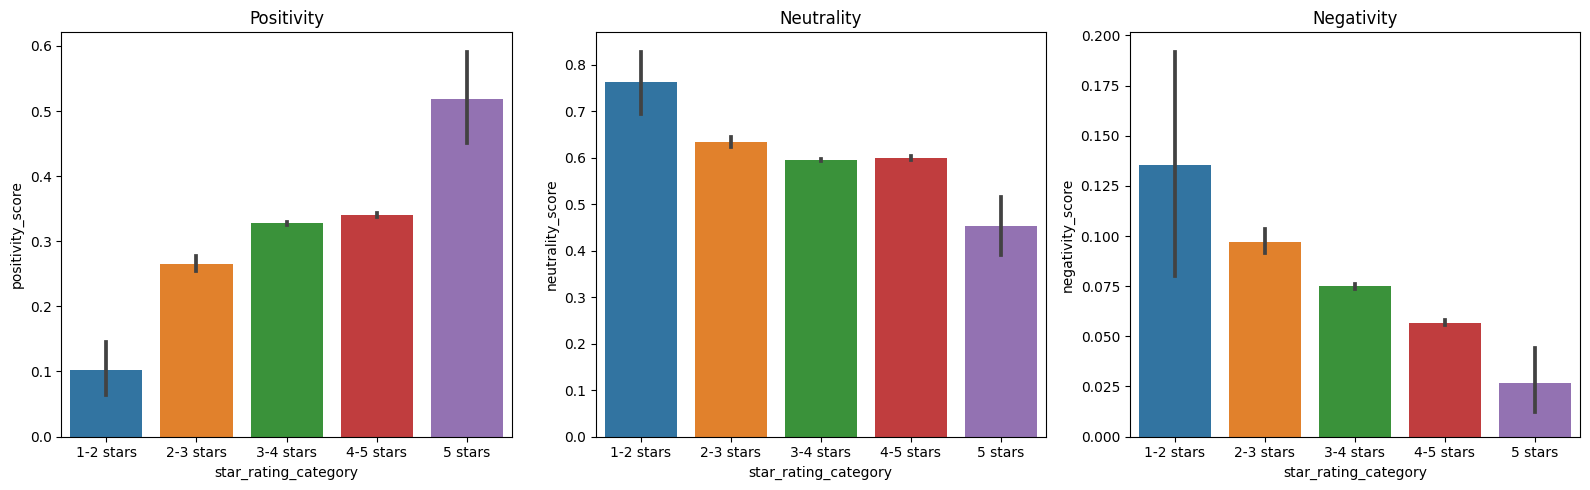

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16,5))

sns.barplot(data = review_table, x = 'star_rating_category', y = 'positivity_score', ax = axs[0])
sns.barplot(data = review_table, x = 'star_rating_category', y = 'neutrality_score', ax = axs[1])
sns.barplot(data = review_table, x = 'star_rating_category', y = 'negativity_score', ax = axs[2])

axs[0].set_title("Positivity")
axs[1].set_title("Neutrality")
axs[2].set_title("Negativity")

plt.tight_layout()
plt.show()

# Now lets see star ratings vs compounded score

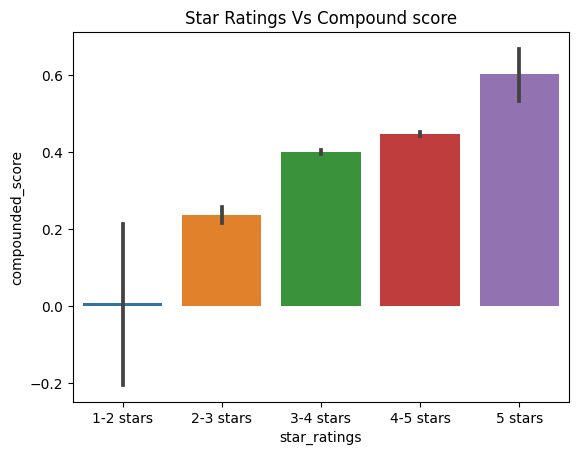

<Figure size 640x480 with 0 Axes>

In [ ]:
# we plot a barplot
vader_plot = sns.barplot(data=review_table, x = 'star_rating_category', y = 'compounded_score')

vader_plot.set(xlabel = 'star_ratings', ylabel = 'compounded_score')

plt.title('Star Ratings Vs Compound score')

plt.show()
plt.tight_layout() # to fit the plot properly

# Inferences

# ***This plot tells us that the results obtained by vader are very much in sync with the reality***

In [ ]:
star_category_counts = review_table['star_rating_category'].value_counts()

In [ ]:
star_category_counts

3-4 stars    41155
4-5 stars    24209
2-3 stars     2309
5 stars         60
1-2 stars       21
Name: star_rating_category, dtype: int64

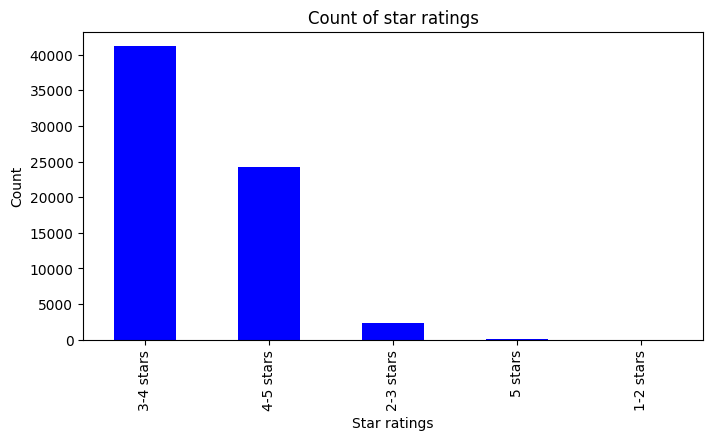

In [ ]:
star_ratings_bar_graph = star_category_counts.plot(kind="bar",
                              color="blue",
                              title = "Count of star ratings",
                              figsize=(8,4))

star_ratings_bar_graph.set_xlabel("Star ratings")
star_ratings_bar_graph.set_ylabel("Count")
plt.show()

# The star ratings are more distributed towards the positive side which means people most people are quiet satisfied with the products

In [ ]:
brand_share_count = review_table['brand'].value_counts()

In [ ]:
brand_share_count

Samsung     33603
Motorola     8879
Nokia        5913
Apple        5144
Xiaomi       4411
Google       3786
Sony         3195
HUAWEI       2225
OnePlus       347
ASUS          251
Name: brand, dtype: int64

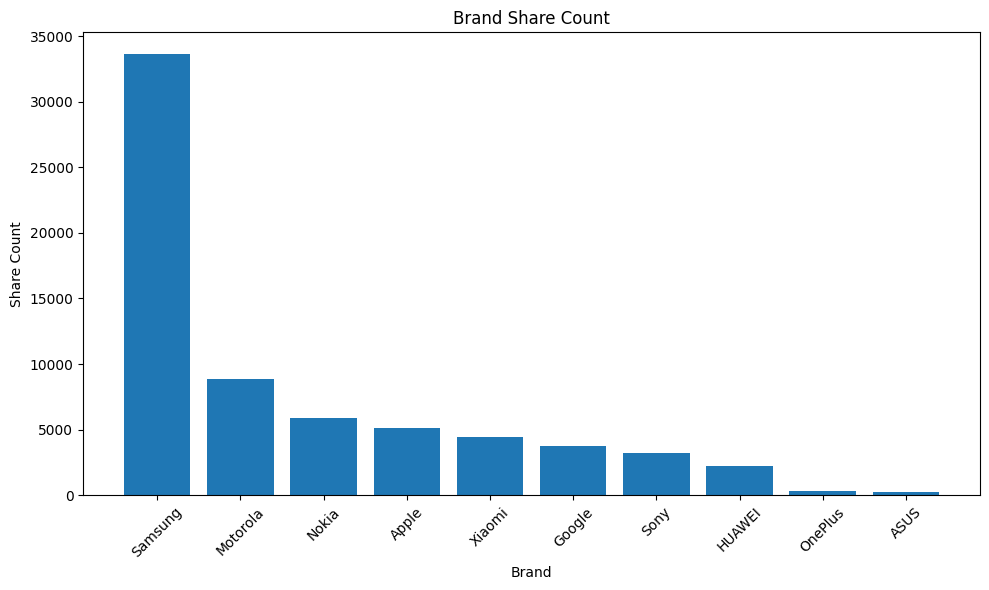

In [ ]:
# Sample data
data = {
    'brand': ['Samsung', 'Motorola', 'Nokia', 'Apple', 'Xiaomi', 'Google', 'Sony', 'HUAWEI', 'OnePlus', 'ASUS'],
    'brand_share_count': [33603, 8879, 5913, 5144, 4411, 3786, 3195, 2225, 347, 251]
}

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(df['brand'], df['brand_share_count'])
plt.xlabel('Brand')
plt.ylabel('Share Count')
plt.title('Brand Share Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

# Show the plot
plt.tight_layout()
plt.show()

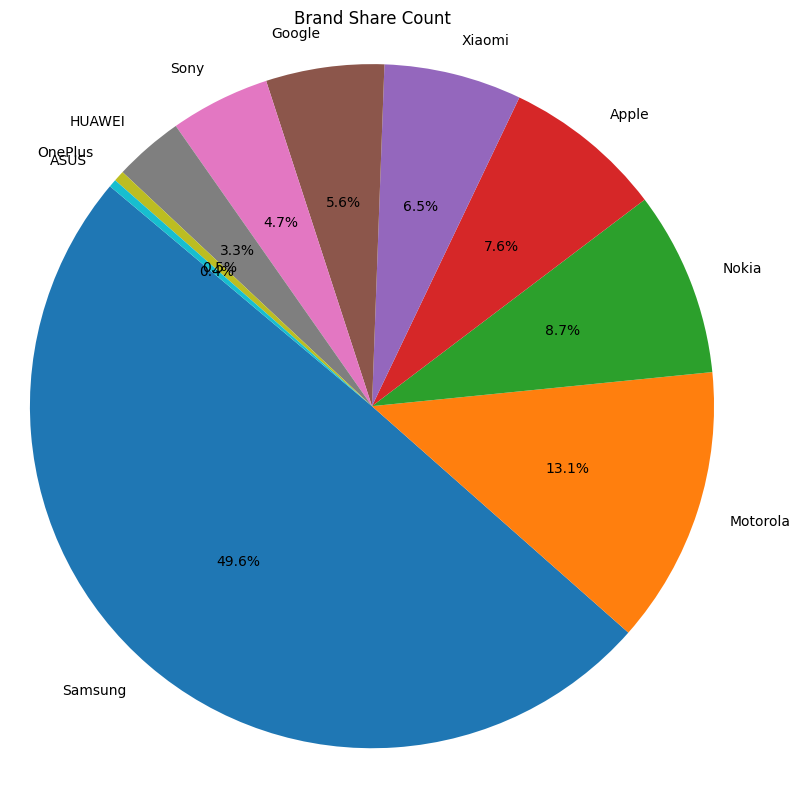

In [ ]:
# Sample data
data = {
    'brand': ['Samsung', 'Motorola', 'Nokia', 'Apple', 'Xiaomi', 'Google', 'Sony', 'HUAWEI', 'OnePlus', 'ASUS'],
    'brand_share_count': [33603, 8879, 5913, 5144, 4411, 3786, 3195, 2225, 347, 251]
}

# Creating a pandas DataFrame from the data
df = pd.DataFrame(data)

# Creating a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(df['brand_share_count'], labels=df['brand'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.title('Brand Share Count')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
review_table.columns

Index(['sl_no', 'negativity_score', 'neutrality_score', 'positivity_score',
       'compounded_score', 'product_id', 'reviewer_name', 'star_ratings',
       'review_date', 'verified', 'device_name', 'reviews', 'brand',
       'total_reviews', 'price', 'cleaned_reviews', 'processed_reviews',
       'star_rating_category'],
      dtype='object')

#Using the pandas profiling tool


In [ ]:
! pip install pandas_profiling
from pandas_profiling import ProfileReport


<ipython-input-101-21e4941460e2>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
profile_report =  ProfileReport(review_table)
profile_report.to_file(output_file = '/content/review_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Relations between the attributes using heatmap

## Creating a dataframe containing only numerical attributes from existing data frame for the  plotting heatmap

In [ ]:
review_table.columns

Index(['sl_no', 'negativity_score', 'neutrality_score', 'positivity_score',
       'compounded_score', 'product_id', 'reviewer_name', 'star_ratings',
       'review_date', 'verified', 'device_name', 'reviews', 'brand',
       'total_reviews', 'price', 'cleaned_reviews', 'processed_reviews',
       'star_rating_category'],
      dtype='object')

In [ ]:
review_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67754 entries, 0 to 67753
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   sl_no                 67754 non-null  int64   
 1   negativity_score      67754 non-null  float64 
 2   neutrality_score      67754 non-null  float64 
 3   positivity_score      67754 non-null  float64 
 4   compounded_score      67754 non-null  float64 
 5   product_id            67754 non-null  object  
 6   reviewer_name         67754 non-null  object  
 7   star_ratings          67754 non-null  float64 
 8   review_date           67754 non-null  object  
 9   verified              67754 non-null  bool    
 10  device_name           67754 non-null  object  
 11  reviews               67754 non-null  object  
 12  brand                 67754 non-null  object  
 13  total_reviews         67754 non-null  int64   
 14  price                 67754 non-null  float64 
 15  cl

In [ ]:
correlation_table = review_table.drop(['sl_no', 'product_id', 'reviewer_name', 'review_date', 'verified', 'device_name', 'reviews', 'brand', 'cleaned_reviews',
                                      'processed_reviews', 'star_rating_category'], axis = 1)

In [ ]:
# Seeing if all non numerical attributes are filtered
correlation_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67754 entries, 0 to 67753
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   negativity_score  67754 non-null  float64
 1   neutrality_score  67754 non-null  float64
 2   positivity_score  67754 non-null  float64
 3   compounded_score  67754 non-null  float64
 4   star_ratings      67754 non-null  float64
 5   total_reviews     67754 non-null  int64  
 6   price             67754 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 6.2 MB


In [ ]:
reviews_correlation_table = correlation_table.corr()

In [ ]:
reviews_correlation_table

,negativity_score,neutrality_score,positivity_score,compounded_score,star_ratings,total_reviews,price
negativity_score,1.000000,-0.061103,-0.365969,-0.554609,-0.100851,-0.017445,-0.021535
neutrality_score,-0.061103,1.000000,-0.890952,-0.345991,-0.015650,-0.036324,0.005132
positivity_score,-0.365969,-0.890952,1.000000,0.567989,0.057280,0.042136,0.004613
compounded_score,-0.554609,-0.345991,0.567989,1.000000,0.092888,0.039475,0.021581
star_ratings,-0.100851,-0.015650,0.057280,0.092888,1.000000,0.073100,0.373294
total_reviews,-0.017445,-0.036324,0.042136,0.039475,0.073100,1.000000,0.037765
price,-0.021535,0.005132,0.004613,0.021581,0.373294,0.037765,1.000000


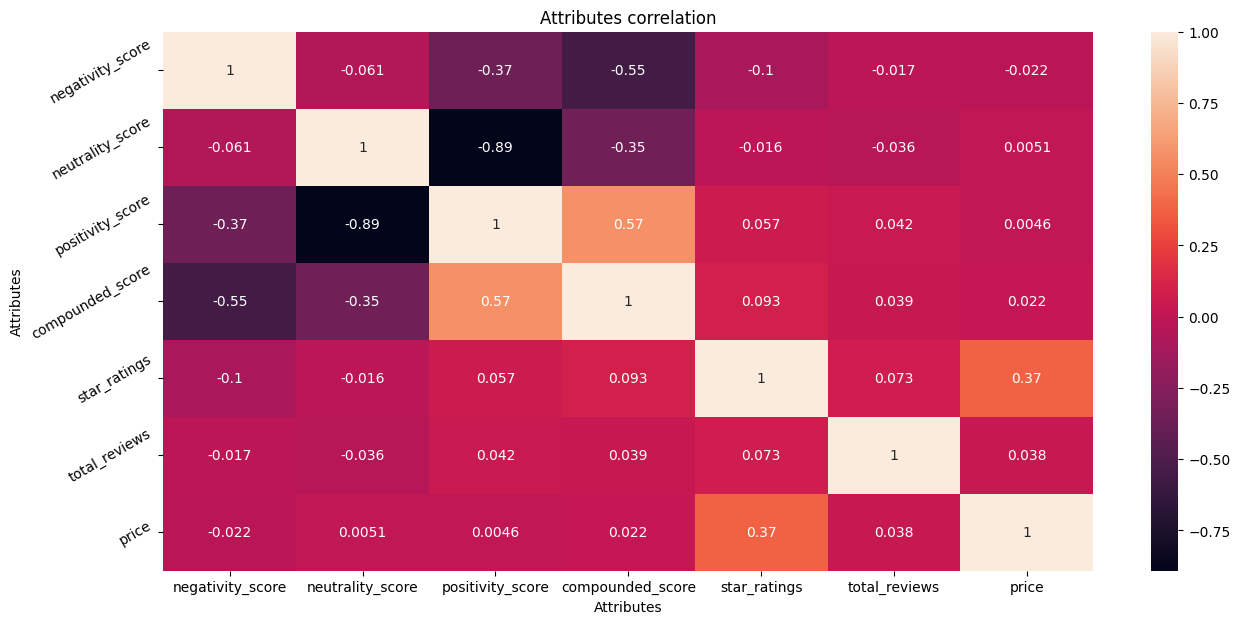

In [ ]:
plt.figure(figsize = (15,7))

reviews_heatmap = sns.heatmap(reviews_correlation_table, annot = True, cmap='rocket')
reviews_heatmap.set(title = "Attributes correlation", xlabel = "Attributes", ylabel = "Attributes")

plt.xticks(rotation = 360) # This is to rotate the x axis label to certain degrees
plt.yticks(rotation = 30) # This is to rotate the y axis label to certain degrees
plt.show()

# Word Cloud
> The word cloud gives us the picture of the most discussed aspect of the phone

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

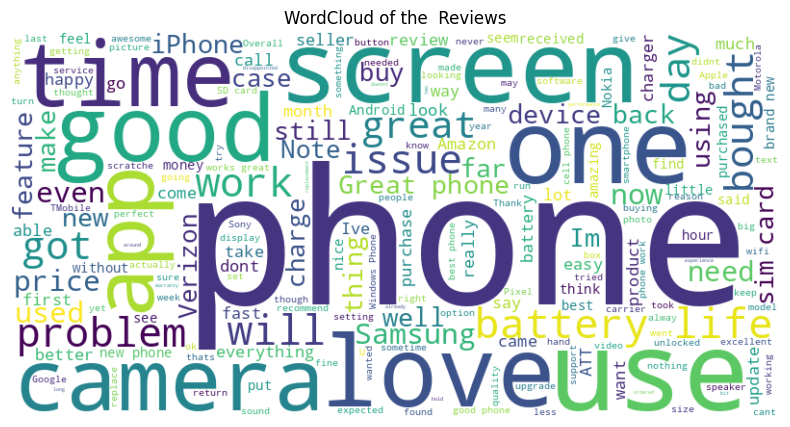

In [ ]:
# Step 1: Extracting text data and store it in a Numpy array
reviews_array = review_table['cleaned_reviews'].values

# Step 2: Combine text data into a single string
combined_text = ' '.join(reviews_array)

# Step 3: Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of the  Reviews')
plt.show()

# Separate wordclouds for positive, negative, neutral reviews

In [ ]:
review_table.columns

Index(['sl_no', 'negativity_score', 'neutrality_score', 'positivity_score',
       'compounded_score', 'product_id', 'reviewer_name', 'star_ratings',
       'review_date', 'verified', 'device_name', 'reviews', 'brand',
       'total_reviews', 'price', 'cleaned_reviews', 'processed_reviews',
       'star_rating_category'],
      dtype='object')

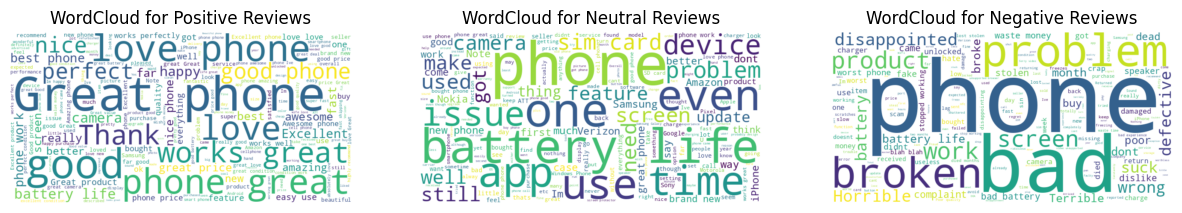

In [ ]:

#Filtering reviews based on sentiment scores
positive_reviews = review_table[review_table['positivity_score'] > 0.5]['processed_reviews'].values
neutral_reviews = review_table[review_table['neutrality_score'] >= 0.5]['processed_reviews'].values
negative_reviews = review_table[review_table['negativity_score'] >= 0.5]['processed_reviews'].values

# Step 2: Combining text data for each category into single strings
combined_positive_text = ' '.join(positive_reviews)
combined_neutral_text = ' '.join(neutral_reviews)
combined_negative_text = ' '.join(negative_reviews)

# Generating WordClouds for each category
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(combined_positive_text)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(combined_neutral_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(combined_negative_text)

# Displaying the WordClouds for each category
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Reviews')

plt.subplot(132)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Neutral Reviews')

plt.subplot(133)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Reviews')

plt.show()


In [ ]:
type(positive_reviews)

numpy.ndarray

In [ ]:
review_table['neutrality_score'] >= 0.5

0         True
1         True
2         True
3         True
4        False
         ...  
67749     True
67750     True
67751     True
67752     True
67753    False
Name: neutrality_score, Length: 67754, dtype: bool

In [ ]:
(review_table['neutrality_score'] >= 0.5).values

array([ True,  True,  True, ...,  True,  True, False])

In [ ]:
(review_table['neutrality_score'] >= 0.5).index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            67744, 67745, 67746, 67747, 67748, 67749, 67750, 67751, 67752,
            67753],
           dtype='int64', length=67754)

In [ ]:
type(review_table['neutrality_score'] >= 0.5)

pandas.core.series.Series